In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importação das bibliotecas
import re
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
path = '/content/drive/MyDrive/Aviator/Data1/bd_pseudo_1.csv'
data = pd.read_csv(path)

print(data.columns)

t = 0
print(len(data))
t0 = len(data)
tamanho_data = len(data)

odd = []
horario = []
odd_ajustada = []

while t <= t0:
    if t < tamanho_data:
        value = data['odd'][t]
        if isinstance(value, float):
            odd.append(np.nan)  # or any other value to represent missing data
        else:
            aux = value.split('\n\n')
            a1 = aux[0].replace(')I', '')
            a2 = a1.replace(')', '')
            a3 = a2.replace('|', '1')
            a4 = a3.replace('?', '7')
            a5 = re.sub('[^0-9.]', '', a4)
            odd.append(float(a5))
        horario.append(data['hora_criacao'][t])

    t += 1

data1 = pd.DataFrame({'odd': odd, 'apostadores': data['apostadores'], 'data_hora': horario})
data = data1
data['data_hora'] = pd.to_datetime(data['data_hora'])
data.head()

Index(['id', 'odd', 'hora_criacao', 'apostadores'], dtype='object')
25291


,odd,apostadores,data_hora
0,13.89,1650.0,2023-05-27 00:28:06
1,1.44,22211.0,2023-05-27 00:28:18
2,3.39,1751.0,2023-05-27 00:28:42
3,1.27,1950.0,2023-05-27 00:28:56
4,5.16,2086.0,2023-05-27 00:29:26


In [9]:
horario = []
date = []
for i in range(len(data)):
  #print(data['date'][i])
  dt1 = datetime.strftime(data['data_hora'][i],'%H:%M:%S')
  horario.append(dt1)
  dt2 = datetime.strftime(data['data_hora'][i],'%Y-%m-%d')
  date.append(dt2)
data['horario'] = horario
data['date'] = date
data.head()

,odd,apostadores,data_hora,horario,date
0,13.89,1650.0,2023-05-27 00:28:06,00:28:06,2023-05-27
1,1.44,22211.0,2023-05-27 00:28:18,00:28:18,2023-05-27
2,3.39,1751.0,2023-05-27 00:28:42,00:28:42,2023-05-27
3,1.27,1950.0,2023-05-27 00:28:56,00:28:56,2023-05-27
4,5.16,2086.0,2023-05-27 00:29:26,00:29:26,2023-05-27


In [10]:
i = 0
t = len(data['horario'])
#print(t)
segundo = []
minuto = []
hora = []

for j in range(0,t):
    #print(data['Hora_Aposta'][j])
    #print(data['Hora_Aposta'][j].split(":"))
    x = data['horario'][j].split(":")
    segundo.append(float(x[2]))
    minuto.append(float(x[1]))
    hora.append(int(x[0]))

data['hora'] = hora
for j in range(0,t):
    segundo[j] = segundo[j]/60
    minuto[j] = minuto[j] + round(segundo[j],6)

for j in range(0,t):
    minuto[j] = round(minuto[j]/60, 6)

data['hour_edi'] = data['hora']
for j in range(0,t):
    data['hour_edi'][j] = data['hour_edi'][j] + minuto[j]

data.head()

<ipython-input-10-363c76c6cc13>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour_edi'][j] = data['hour_edi'][j] + minuto[j]


,odd,apostadores,data_hora,horario,date,hora,hour_edi
0,13.89,1650.0,2023-05-27 00:28:06,00:28:06,2023-05-27,0,0.468333
1,1.44,22211.0,2023-05-27 00:28:18,00:28:18,2023-05-27,0,0.471667
2,3.39,1751.0,2023-05-27 00:28:42,00:28:42,2023-05-27,0,0.478333
3,1.27,1950.0,2023-05-27 00:28:56,00:28:56,2023-05-27,0,0.482222
4,5.16,2086.0,2023-05-27 00:29:26,00:29:26,2023-05-27,0,0.490556


In [11]:
data1 = data
data1.columns = ['Odds','Qt_Apostadores','Data_Hora_Aposta','Hora_Aposta','Date_Aposta','hour','hour_edi']
data1 = data.head(2314)
data1

,Odds,Qt_Apostadores,Data_Hora_Aposta,Hora_Aposta,Date_Aposta,hour,hour_edi
0,13.89,1650.0,2023-05-27 00:28:06,00:28:06,2023-05-27,0,0.468333
1,1.44,22211.0,2023-05-27 00:28:18,00:28:18,2023-05-27,0,0.471667
2,3.39,1751.0,2023-05-27 00:28:42,00:28:42,2023-05-27,0,0.478333
3,1.27,1950.0,2023-05-27 00:28:56,00:28:56,2023-05-27,0,0.482222
4,5.16,2086.0,2023-05-27 00:29:26,00:29:26,2023-05-27,0,0.490556
...,...,...,...,...,...,...,...
2309,1.16,1219.0,2023-05-27 18:19:36,18:19:36,2023-05-27,18,18.326667
2310,12.47,1073.0,2023-05-27 18:20:16,18:20:16,2023-05-27,18,18.337778
2311,1.71,1343.0,2023-05-27 18:20:33,18:20:33,2023-05-27,18,18.342500
2312,1.53,1202.0,2023-05-27 18:20:49,18:20:49,2023-05-27,18,18.346944


In [12]:
data['Hora_Aposta'].describe()

count        25291
unique       22049
top       18:11:06
freq             5
Name: Hora_Aposta, dtype: object

In [18]:
data2 = data[data['Date_Aposta'] < '2023-07-21']
data1 = data[data['Date_Aposta'] == '2023-07-21']
data1

,Odds,Qt_Apostadores,Data_Hora_Aposta,Hora_Aposta,Date_Aposta,hour,hour_edi
22597,9.25,3094.0,2023-07-21 00:00:03,00:00:03,2023-07-21,0,0.000833
22598,1.00,2554.0,2023-07-21 00:00:14,00:00:14,2023-07-21,0,0.003889
22599,11.60,32211.0,2023-07-21 00:00:51,00:00:51,2023-07-21,0,0.014167
22600,1.18,22151.0,2023-07-21 00:01:05,00:01:05,2023-07-21,0,0.018056
22601,12.89,3219.0,2023-07-21 00:01:46,00:01:46,2023-07-21,0,0.029444
...,...,...,...,...,...,...,...
25175,1.05,1640.0,2023-07-21 23:58:43,23:58:43,2023-07-21,23,23.978611
25176,1.82,1836.0,2023-07-21 23:58:59,23:58:59,2023-07-21,23,23.983056
25177,2.38,1705.0,2023-07-21 23:59:21,23:59:21,2023-07-21,23,23.989167
25178,1.88,1795.0,2023-07-21 23:59:39,23:59:39,2023-07-21,23,23.994167


In [19]:
data2

,Odds,Qt_Apostadores,Data_Hora_Aposta,Hora_Aposta,Date_Aposta,hour,hour_edi
0,13.89,1650.0,2023-05-27 00:28:06,00:28:06,2023-05-27,0,0.468333
1,1.44,22211.0,2023-05-27 00:28:18,00:28:18,2023-05-27,0,0.471667
2,3.39,1751.0,2023-05-27 00:28:42,00:28:42,2023-05-27,0,0.478333
3,1.27,1950.0,2023-05-27 00:28:56,00:28:56,2023-05-27,0,0.482222
4,5.16,2086.0,2023-05-27 00:29:26,00:29:26,2023-05-27,0,0.490556
...,...,...,...,...,...,...,...
22592,2.60,3239.0,2023-07-20 23:57:56,23:57:56,2023-07-20,23,23.965556
22593,2.05,2799.0,2023-07-20 23:58:19,23:58:19,2023-07-20,23,23.971944
22594,1.73,2959.0,2023-07-20 23:58:35,23:58:35,2023-07-20,23,23.976389
22595,6.38,2494.0,2023-07-20 23:59:09,23:59:09,2023-07-20,23,23.985833


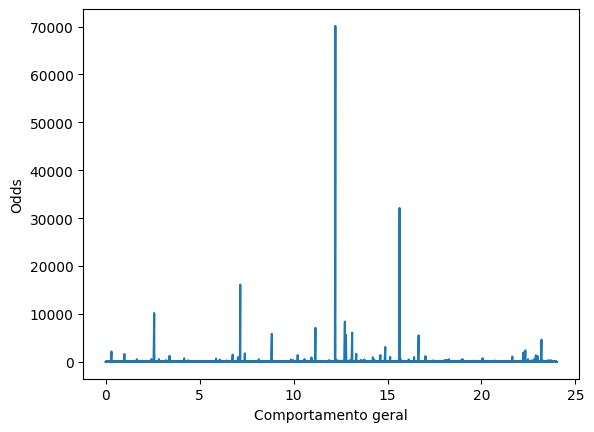

In [20]:
plt.plot(np.array(data['hour_edi']), np.array(data['Odds']))
plt.xlabel("Comportamento geral")
plt.ylabel("Odds")
plt.show()

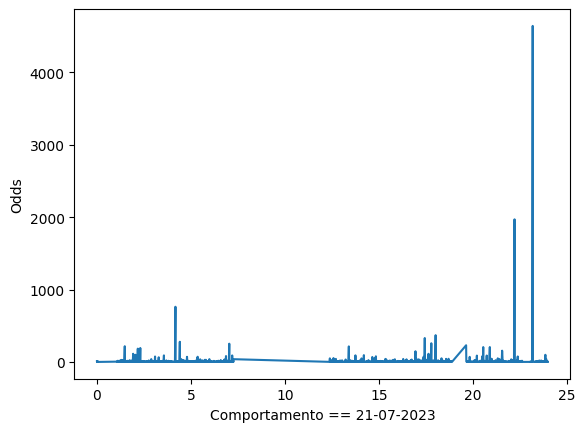

In [22]:
plt.plot(np.array(data1['hour_edi']), np.array(data1['Odds']))
plt.xlabel("Comportamento == 21-07-2023")
plt.ylabel("Odds")
plt.show()

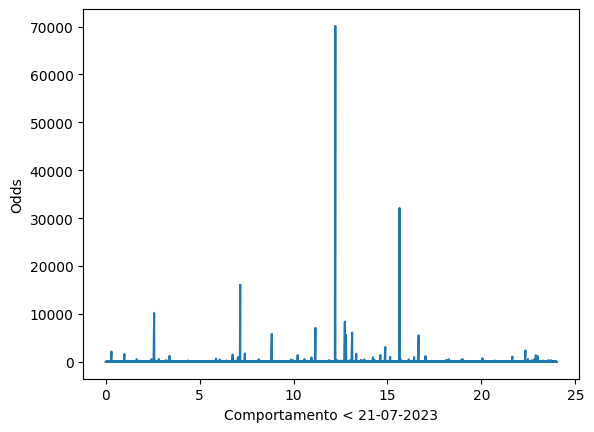

In [23]:
plt.plot(np.array(data2['hour_edi']), np.array(data2['Odds']))
plt.xlabel("Comportamento < 21-07-2023")
plt.ylabel("Odds")
plt.show()

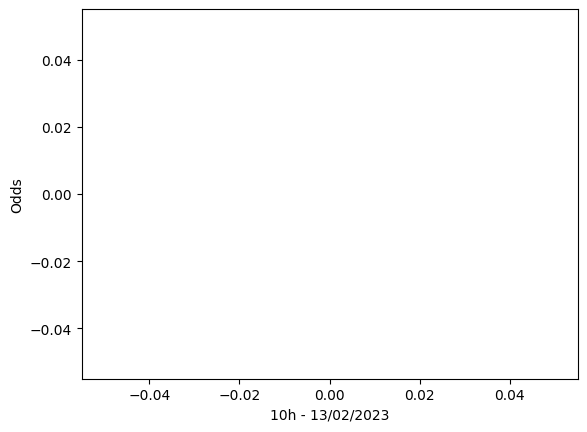

In [24]:
X1 = data1[data1['hour'] == 10]
plt.plot(np.array(X1['hour_edi']), np.array(X1['Odds']))
plt.xlabel("10h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [25]:
print('Hora: 10h - Geral: ', len(X1['Odds']), '\n',
"Media >= 1.29: ",len(X1[X1['Odds'] >= 1.29])/len(X1['Odds']),'\n',
"Media >= 1.40: ",len(X1[X1['Odds'] >= 1.40])/len(X1['Odds']),'\n',
"Media >= 1.45: ",len(X1[X1['Odds'] >= 1.45])/len(X1['Odds']),'\n',
"Media >= 1.61: ",len(X1[X1['Odds'] >= 1.65])/len(X1['Odds']),'\n')

ZeroDivisionError: ignored

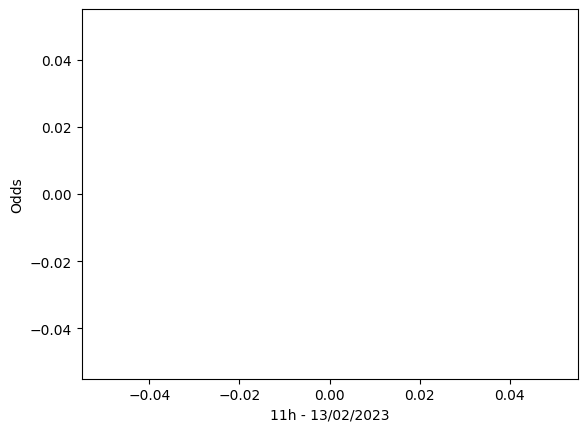

In [26]:
X2 = data1[data1['hour'] == 11]
plt.plot(np.array(X2['hour_edi']), np.array(X2['Odds']))
plt.xlabel("11h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [ ]:
print('Hora 11h - Geral: ', len(X2['Odds']), '\n',
"Media >= 1.29: ",len(X2[X2['Odds'] >= 1.29])/len(X2['Odds']),'\n',
"Media >= 1.40: ",len(X2[X2['Odds'] >= 1.40])/len(X2['Odds']),'\n',
"Media >= 1.45: ",len(X2[X2['Odds'] >= 1.45])/len(X2['Odds']),'\n',
"Media >= 1.61: ",len(X2[X2['Odds'] >= 1.65])/len(X2['Odds']),'\n')

Hora 11h - Geral:  126 
 Media >= 1.29:  0.8015873015873016 
 Media >= 1.40:  0.7222222222222222 
 Media >= 1.45:  0.7063492063492064 
 Media >= 1.61:  0.6349206349206349 



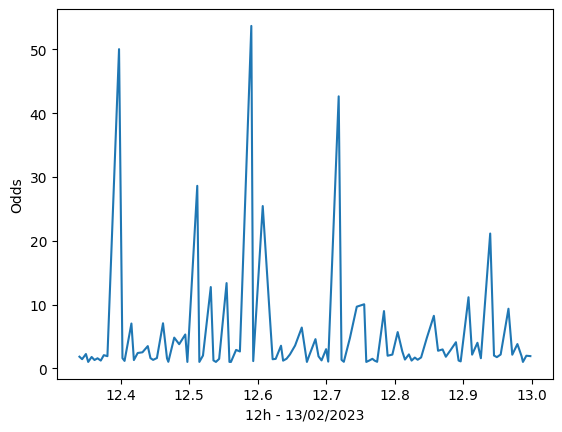

In [27]:
X3 = data1[data1['hour'] == 12]
plt.plot(np.array(X3['hour_edi']), np.array(X3['Odds']))
plt.xlabel("12h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [28]:
print('Hora: 12h - Geral: ', len(X3['Odds']), '\n',
"Media >= 1.29: ",len(X3[X3['Odds'] >= 1.29])/len(X3['Odds']),'\n',
"Media >= 1.40: ",len(X3[X3['Odds'] >= 1.40])/len(X3['Odds']),'\n',
"Media >= 1.45: ",len(X3[X3['Odds'] >= 1.45])/len(X3['Odds']),'\n',
"Media >= 1.61: ",len(X3[X3['Odds'] >= 1.65])/len(X3['Odds']),'\n')

Hora: 12h - Geral:  105 
 Media >= 1.29:  0.7714285714285715 
 Media >= 1.40:  0.7142857142857143 
 Media >= 1.45:  0.6952380952380952 
 Media >= 1.61:  0.6 



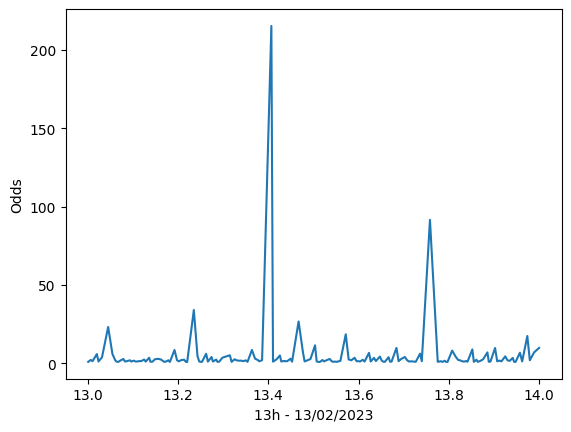

In [29]:
X4 = data1[data1['hour'] == 13]
plt.plot(np.array(X4['hour_edi']), np.array(X4['Odds']))
plt.xlabel("13h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [ ]:
print('Hora 13h - Geral: ', len(X4['Odds']), '\n',
"Media >= 1.29: ",len(X4[X4['Odds'] >= 1.29])/len(X4['Odds']),'\n',
"Media >= 1.40: ",len(X4[X4['Odds'] >= 1.40])/len(X4['Odds']),'\n',
"Media >= 1.45: ",len(X4[X4['Odds'] >= 1.45])/len(X4['Odds']),'\n',
"Media >= 1.61: ",len(X4[X4['Odds'] >= 1.65])/len(X4['Odds']),'\n')

Hora 13h - Geral:  149 
 Media >= 1.29:  0.7315436241610739 
 Media >= 1.40:  0.6510067114093959 
 Media >= 1.45:  0.6510067114093959 
 Media >= 1.61:  0.5570469798657718 



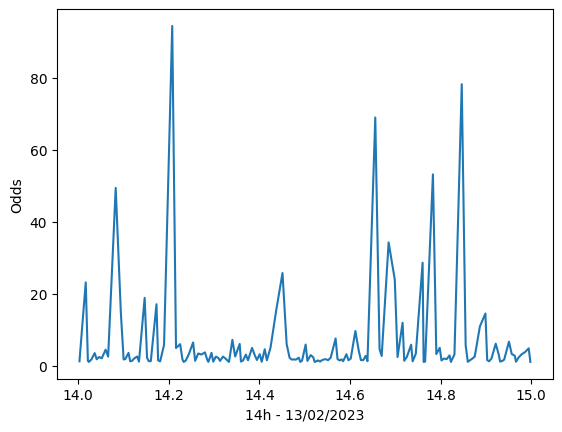

In [30]:
X5 = data1[data1['hour'] == 14]
plt.plot(np.array(X5['hour_edi']), np.array(X5['Odds']))
plt.xlabel("14h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [31]:
print('Hora 14h - Geral: ', len(X5['Odds']), '\n',
"Media >= 1.29: ",len(X5[X5['Odds'] >= 1.29])/len(X5['Odds']),'\n',
"Media >= 1.40: ",len(X5[X5['Odds'] >= 1.40])/len(X5['Odds']),'\n',
"Media >= 1.45: ",len(X5[X5['Odds'] >= 1.45])/len(X5['Odds']),'\n',
"Media >= 1.61: ",len(X5[X5['Odds'] >= 1.65])/len(X5['Odds']),'\n')

Hora 14h - Geral:  151 
 Media >= 1.29:  0.8079470198675497 
 Media >= 1.40:  0.7483443708609272 
 Media >= 1.45:  0.7152317880794702 
 Media >= 1.61:  0.6423841059602649 



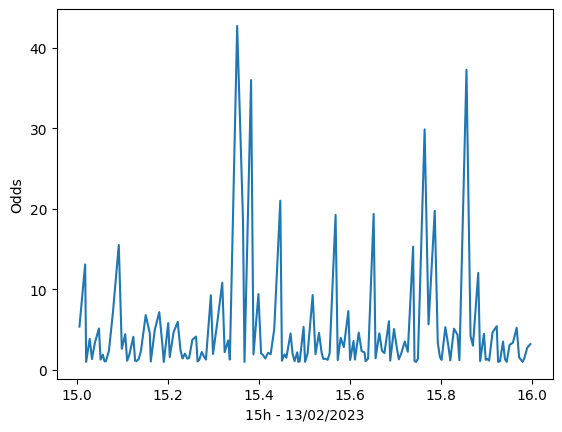

In [32]:
X6 = data1[data1['hour'] == 15]
plt.plot(np.array(X6['hour_edi']), np.array(X6['Odds']))
plt.xlabel("15h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [33]:
print('Hora 15h - Geral: ', len(X6['Odds']), '\n',
"Media >= 1.29: ",len(X6[X6['Odds'] >= 1.29])/len(X6['Odds']),'\n',
"Media >= 1.40: ",len(X6[X6['Odds'] >= 1.40])/len(X6['Odds']),'\n',
"Media >= 1.45: ",len(X6[X6['Odds'] >= 1.45])/len(X6['Odds']),'\n',
"Media >= 1.61: ",len(X6[X6['Odds'] >= 1.65])/len(X6['Odds']),'\n')


Hora 15h - Geral:  153 
 Media >= 1.29:  0.7843137254901961 
 Media >= 1.40:  0.7058823529411765 
 Media >= 1.45:  0.6666666666666666 
 Media >= 1.61:  0.6209150326797386 



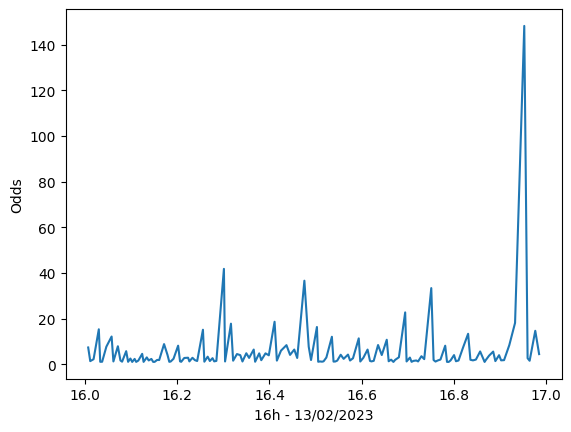

In [34]:
X7 = data1[data1['hour'] == 16]
plt.plot(np.array(X7['hour_edi']), np.array(X7['Odds']))
plt.xlabel("16h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [35]:

print('Hora 16h - Geral: ', len(X7['Odds']), '\n',
"Media >= 1.29: ",len(X7[X7['Odds'] >= 1.29])/len(X7['Odds']),'\n',
"Media >= 1.40: ",len(X7[X7['Odds'] >= 1.40])/len(X7['Odds']),'\n',
"Media >= 1.45: ",len(X7[X7['Odds'] >= 1.45])/len(X7['Odds']),'\n',
"Media >= 1.61: ",len(X7[X7['Odds'] >= 1.65])/len(X7['Odds']),'\n')



Hora 16h - Geral:  146 
 Media >= 1.29:  0.7534246575342466 
 Media >= 1.40:  0.726027397260274 
 Media >= 1.45:  0.7054794520547946 
 Media >= 1.61:  0.6232876712328768 



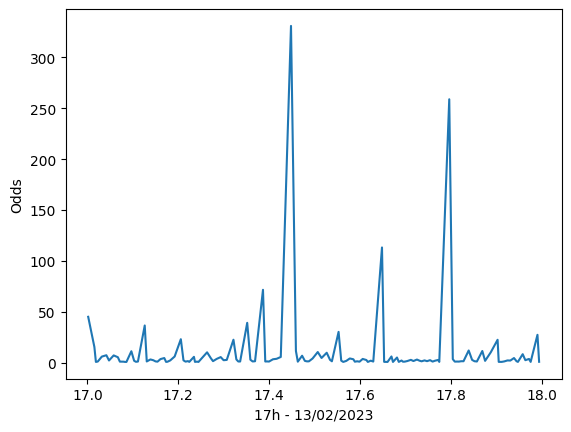

In [36]:
X8 = data1[data1['hour'] == 17]
plt.plot(np.array(X8['hour_edi']), np.array(X8['Odds']))
plt.xlabel("17h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [37]:
print('Hora 17h - Geral: ', len(X8['Odds']), '\n',
"Media >= 1.29: ",len(X8[X8['Odds'] >= 1.29])/len(X8['Odds']),'\n',
"Media >= 1.40: ",len(X8[X8['Odds'] >= 1.40])/len(X8['Odds']),'\n',
"Media >= 1.45: ",len(X8[X8['Odds'] >= 1.45])/len(X8['Odds']),'\n',
"Media >= 1.61: ",len(X8[X8['Odds'] >= 1.65])/len(X8['Odds']),'\n')


Hora 17h - Geral:  143 
 Media >= 1.29:  0.7832167832167832 
 Media >= 1.40:  0.7062937062937062 
 Media >= 1.45:  0.6783216783216783 
 Media >= 1.61:  0.6083916083916084 



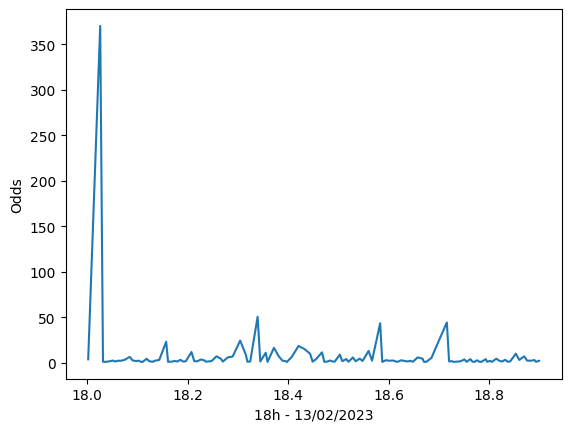

In [38]:
X9 = data1[data1['hour'] == 18]
plt.plot(np.array(X9['hour_edi']), np.array(X9['Odds']))
plt.xlabel("18h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [39]:
print('Hora 18h - Geral: ', len(X9['Odds']), '\n',
"Media >= 1.29: ",len(X9[X9['Odds'] >= 1.29])/len(X9['Odds']),'\n',
"Media >= 1.40: ",len(X9[X9['Odds'] >= 1.40])/len(X9['Odds']),'\n',
"Media >= 1.45: ",len(X9[X9['Odds'] >= 1.45])/len(X9['Odds']),'\n',
"Media >= 1.61: ",len(X9[X9['Odds'] >= 1.65])/len(X9['Odds']),'\n')


Hora 18h - Geral:  130 
 Media >= 1.29:  0.7769230769230769 
 Media >= 1.40:  0.7384615384615385 
 Media >= 1.45:  0.7076923076923077 
 Media >= 1.61:  0.6307692307692307 



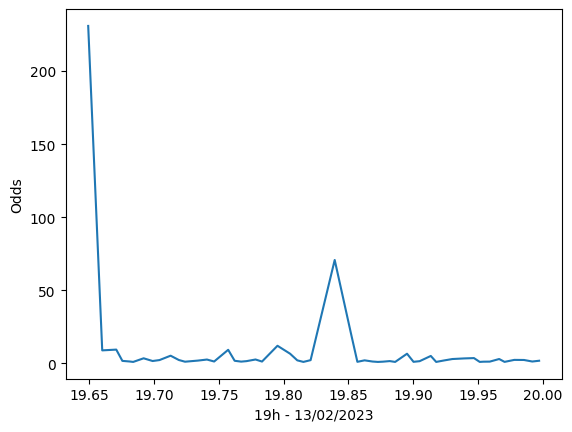

In [40]:
X10 = data1[data1['hour'] == 19]
plt.plot(np.array(X10['hour_edi']), np.array(X10['Odds']))
plt.xlabel("19h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [41]:
print('Hora 19h - Geral: ', len(X10['Odds']), '\n',
"Media >= 1.29: ",len(X10[X10['Odds'] >= 1.29])/len(X10['Odds']),'\n',
"Media >= 1.40: ",len(X10[X10['Odds'] >= 1.40])/len(X10['Odds']),'\n',
"Media >= 1.45: ",len(X10[X10['Odds'] >= 1.45])/len(X10['Odds']),'\n',
"Media >= 1.61: ",len(X10[X10['Odds'] >= 1.65])/len(X10['Odds']),'\n')

Hora 19h - Geral:  54 
 Media >= 1.29:  0.6851851851851852 
 Media >= 1.40:  0.6481481481481481 
 Media >= 1.45:  0.6481481481481481 
 Media >= 1.61:  0.5555555555555556 



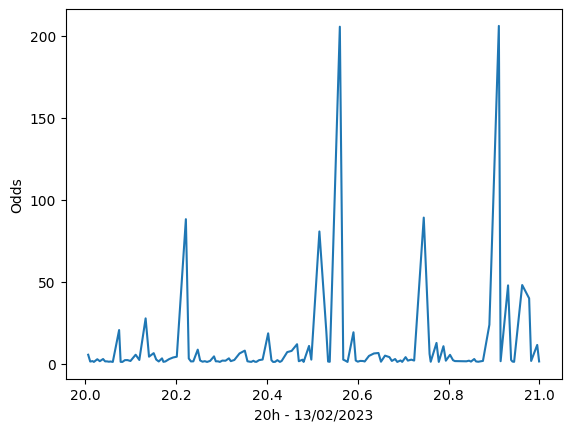

In [42]:
X11 = data1[data1['hour'] == 20]
plt.plot(np.array(X11['hour_edi']), np.array(X11['Odds']))
plt.xlabel("20h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [43]:

print('Hora 20h - Geral: ', len(X11['Odds']), '\n',
"Media >= 1.29: ",len(X11[X11['Odds'] >= 1.29])/len(X11['Odds']),'\n',
"Media >= 1.40: ",len(X11[X11['Odds'] >= 1.40])/len(X11['Odds']),'\n',
"Media >= 1.45: ",len(X11[X11['Odds'] >= 1.45])/len(X11['Odds']),'\n',
"Media >= 1.61: ",len(X11[X11['Odds'] >= 1.65])/len(X11['Odds']),'\n')


Hora 20h - Geral:  134 
 Media >= 1.29:  0.746268656716418 
 Media >= 1.40:  0.664179104477612 
 Media >= 1.45:  0.6417910447761194 
 Media >= 1.61:  0.5447761194029851 



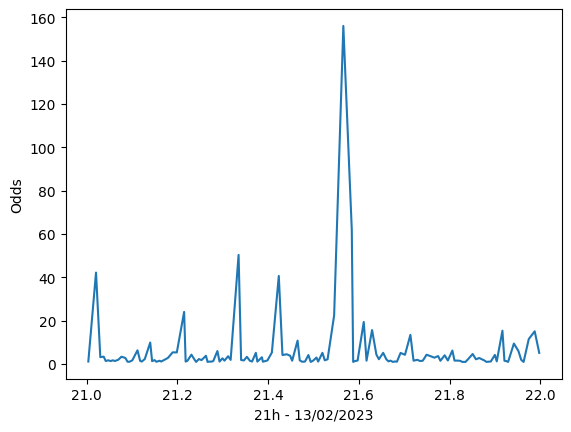

In [44]:
X12 = data1[data1['hour'] == 21]
plt.plot(np.array(X12['hour_edi']), np.array(X12['Odds']))
plt.xlabel("21h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [45]:
print('Hora 21h - Geral: ', len(X12['Odds']), '\n',
"Media >= 1.29: ",len(X12[X12['Odds'] >= 1.29])/len(X12['Odds']),'\n',
"Media >= 1.40: ",len(X12[X12['Odds'] >= 1.40])/len(X12['Odds']),'\n',
"Media >= 1.45: ",len(X12[X12['Odds'] >= 1.45])/len(X12['Odds']),'\n',
"Media >= 1.61: ",len(X12[X12['Odds'] >= 1.65])/len(X12['Odds']),'\n')

Hora 21h - Geral:  141 
 Media >= 1.29:  0.75177304964539 
 Media >= 1.40:  0.7163120567375887 
 Media >= 1.45:  0.6879432624113475 
 Media >= 1.61:  0.5673758865248227 



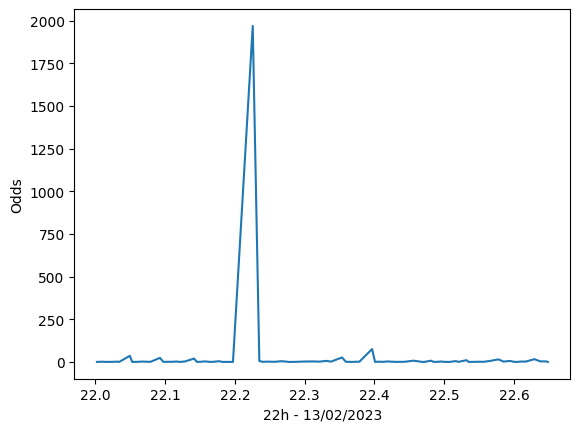

In [46]:
X13 = data1[data1['hour'] == 22]
plt.plot(np.array(X13['hour_edi']), np.array(X13['Odds']))
plt.xlabel("22h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [47]:
print('Hora 22h - Geral: ', len(X13['Odds']), '\n',
"Media >= 1.29: ",len(X13[X13['Odds'] >= 1.29])/len(X13['Odds']),'\n',
"Media >= 1.40: ",len(X13[X13['Odds'] >= 1.40])/len(X13['Odds']),'\n',
"Media >= 1.45: ",len(X13[X13['Odds'] >= 1.45])/len(X13['Odds']),'\n',
"Media >= 1.61: ",len(X13[X13['Odds'] >= 1.65])/len(X13['Odds']),'\n')


Hora 22h - Geral:  97 
 Media >= 1.29:  0.7319587628865979 
 Media >= 1.40:  0.6597938144329897 
 Media >= 1.45:  0.6391752577319587 
 Media >= 1.61:  0.5567010309278351 



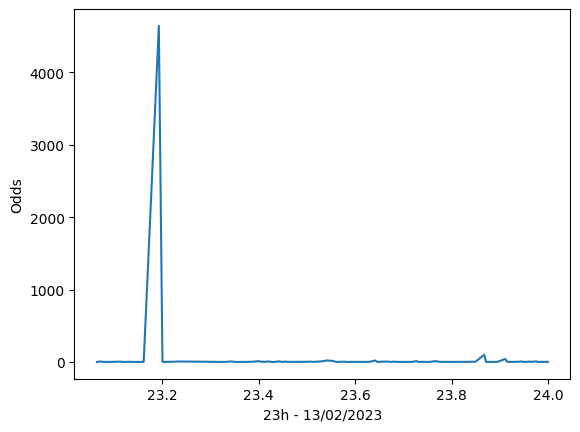

In [48]:
X14 = data1[data1['hour'] == 23]
plt.plot(np.array(X14['hour_edi']), np.array(X14['Odds']))
plt.xlabel("23h - 13/02/2023")
plt.ylabel("Odds")
plt.show()

In [49]:
print('Hora 23h - Geral: ', len(X14['Odds']), '\n',
"Media >= 1.29: ",len(X14[X14['Odds'] >= 1.29])/len(X14['Odds']),'\n',
"Media >= 1.40: ",len(X14[X14['Odds'] >= 1.40])/len(X14['Odds']),'\n',
"Media >= 1.45: ",len(X14[X14['Odds'] >= 1.45])/len(X14['Odds']),'\n',
"Media >= 1.61: ",len(X14[X14['Odds'] >= 1.65])/len(X14['Odds']),'\n')


Hora 23h - Geral:  139 
 Media >= 1.29:  0.7482014388489209 
 Media >= 1.40:  0.6546762589928058 
 Media >= 1.45:  0.6474820143884892 
 Media >= 1.61:  0.5899280575539568 



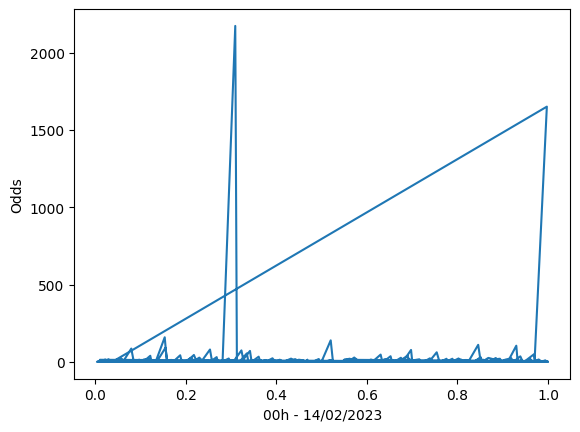

In [50]:
X15 = data2[data2['hour'] == 0]
plt.plot(np.array(X15['hour_edi']), np.array(X15['Odds']))
plt.xlabel("00h - 14/02/2023")
plt.ylabel("Odds")
plt.show()

In [ ]:

print('Hora 00h - Geral: ', len(X15['Odds']), '\n',
"Media >= 1.29: ",len(X15[X15['Odds'] >= 1.29])/len(X15['Odds']),'\n',
"Media >= 1.40: ",len(X15[X15['Odds'] >= 1.40])/len(X15['Odds']),'\n',
"Media >= 1.45: ",len(X15[X15['Odds'] >= 1.45])/len(X15['Odds']),'\n',
"Media >= 1.61: ",len(X15[X15['Odds'] >= 1.65])/len(X15['Odds']),'\n')



Hora 00h - Geral:  145 
 Media >= 1.29:  0.7931034482758621 
 Media >= 1.40:  0.7241379310344828 
 Media >= 1.45:  0.6896551724137931 
 Media >= 1.61:  0.6 



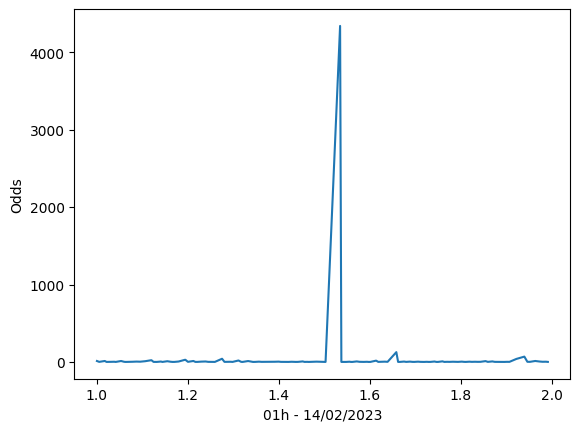

In [ ]:
X16 = data2[data2['hour'] == 1]
plt.plot(np.array(X16['hour_edi']), np.array(X16['Odds']))
plt.xlabel("01h - 14/02/2023")
plt.ylabel("Odds")
plt.show()

In [ ]:
print('Hora 01h - Geral: ', len(X16['Odds']), '\n',
"Media >= 1.29: ",len(X16[X16['Odds'] >= 1.29])/len(X16['Odds']),'\n',
"Media >= 1.40: ",len(X16[X16['Odds'] >= 1.40])/len(X16['Odds']),'\n',
"Media >= 1.45: ",len(X16[X16['Odds'] >= 1.45])/len(X16['Odds']),'\n',
"Media >= 1.61: ",len(X16[X16['Odds'] >= 1.65])/len(X16['Odds']),'\n')


Hora 01h - Geral:  153 
 Media >= 1.29:  0.7581699346405228 
 Media >= 1.40:  0.6666666666666666 
 Media >= 1.45:  0.6470588235294118 
 Media >= 1.61:  0.5947712418300654 



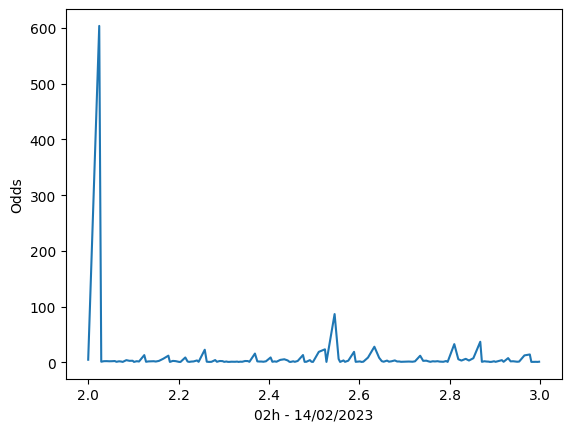

In [ ]:
X17 = data2[data2['hour'] == 2]
plt.plot(np.array(X17['hour_edi']), np.array(X17['Odds']))
plt.xlabel("02h - 14/02/2023")
plt.ylabel("Odds")
plt.show()

In [ ]:
print('Hora 02h - Geral: ', len(X17['Odds']), '\n',
"Media >= 1.29: ",len(X17[X17['Odds'] >= 1.29])/len(X17['Odds']),'\n',
"Media >= 1.40: ",len(X17[X17['Odds'] >= 1.40])/len(X17['Odds']),'\n',
"Media >= 1.45: ",len(X17[X17['Odds'] >= 1.45])/len(X17['Odds']),'\n',
"Media >= 1.61: ",len(X17[X17['Odds'] >= 1.65])/len(X17['Odds']),'\n')

Hora 02h - Geral:  166 
 Media >= 1.29:  0.7228915662650602 
 Media >= 1.40:  0.6506024096385542 
 Media >= 1.45:  0.6204819277108434 
 Media >= 1.61:  0.5602409638554217 



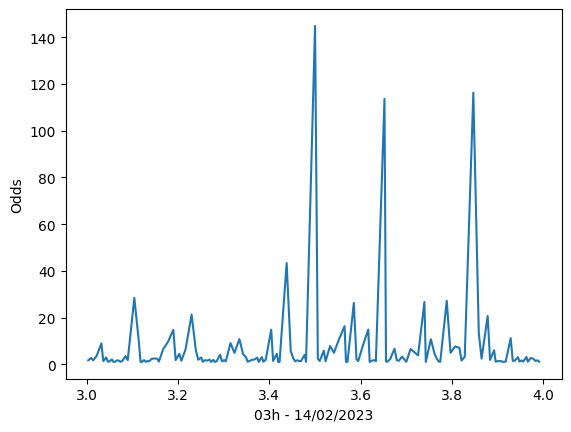

In [ ]:
X18 = data2[data2['hour'] == 3]
plt.plot(np.array(X18['hour_edi']), np.array(X18['Odds']))
plt.xlabel("03h - 14/02/2023")
plt.ylabel("Odds")
plt.show()

In [ ]:

print('Hora 03h - Geral: ', len(X18['Odds']), '\n',
"Media >= 1.29: ",len(X18[X18['Odds'] >= 1.29])/len(X18['Odds']),'\n',
"Media >= 1.40: ",len(X18[X18['Odds'] >= 1.40])/len(X18['Odds']),'\n',
"Media >= 1.45: ",len(X18[X18['Odds'] >= 1.45])/len(X18['Odds']),'\n',
"Media >= 1.61: ",len(X18[X18['Odds'] >= 1.65])/len(X18['Odds']),'\n')


Hora 03h - Geral:  154 
 Media >= 1.29:  0.7467532467532467 
 Media >= 1.40:  0.6688311688311688 
 Media >= 1.45:  0.6428571428571429 
 Media >= 1.61:  0.5844155844155844 



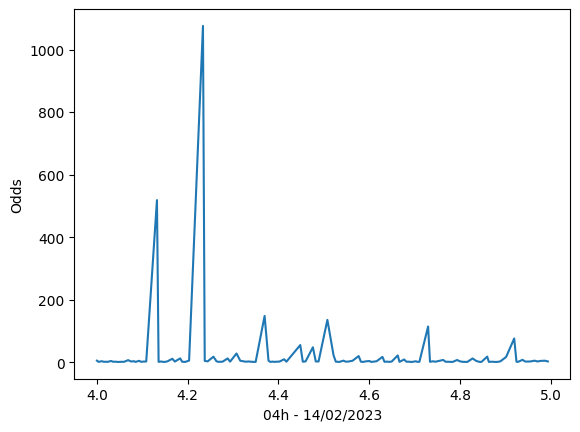

In [ ]:
X19 = data2[data2['hour'] == 4]
plt.plot(np.array(X19['hour_edi']), np.array(X19['Odds']))
plt.xlabel("04h - 14/02/2023")
plt.ylabel("Odds")
plt.show()

In [ ]:
print('Hora 04h - Geral: ', len(X19['Odds']), '\n',
"Media >= 1.29: ",len(X19[X19['Odds'] >= 1.29])/len(X19['Odds']),'\n',
"Media >= 1.40: ",len(X19[X19['Odds'] >= 1.40])/len(X19['Odds']),'\n',
"Media >= 1.45: ",len(X19[X19['Odds'] >= 1.45])/len(X19['Odds']),'\n',
"Media >= 1.61: ",len(X19[X19['Odds'] >= 1.65])/len(X19['Odds']),'\n')


Hora 04h - Geral:  145 
 Media >= 1.29:  0.7655172413793103 
 Media >= 1.40:  0.7172413793103448 
 Media >= 1.45:  0.6896551724137931 
 Media >= 1.61:  0.6206896551724138 



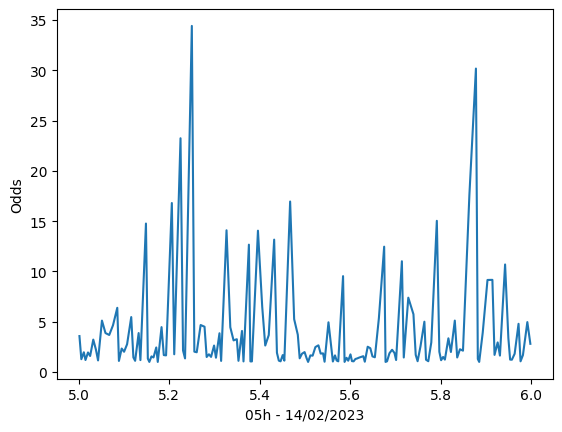

In [ ]:
X20 = data2[data2['hour'] == 5]
plt.plot(np.array(X20['hour_edi']), np.array(X20['Odds']))
plt.xlabel("05h - 14/02/2023")
plt.ylabel("Odds")
plt.show()

In [ ]:
print('Hora 5h - Geral: ', len(X20['Odds']), '\n',
"Media >= 1.29: ",len(X20[X20['Odds'] >= 1.29])/len(X20['Odds']),'\n',
"Media >= 1.40: ",len(X20[X20['Odds'] >= 1.40])/len(X20['Odds']),'\n',
"Media >= 1.45: ",len(X20[X20['Odds'] >= 1.45])/len(X20['Odds']),'\n',
"Media >= 1.61: ",len(X20[X20['Odds'] >= 1.65])/len(X20['Odds']),'\n')



Hora 5h - Geral:  158 
 Media >= 1.29:  0.759493670886076 
 Media >= 1.40:  0.7151898734177216 
 Media >= 1.45:  0.6772151898734177 
 Media >= 1.61:  0.6012658227848101 



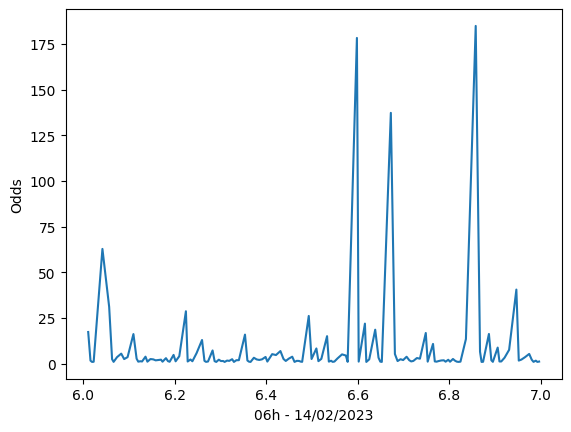

In [ ]:
X21 = data2[data2['hour'] == 6]
plt.plot(np.array(X21['hour_edi']), np.array(X21['Odds']))
plt.xlabel("06h - 14/02/2023")
plt.ylabel("Odds")
plt.show()

In [ ]:
print('Hora 6h - Geral: ', len(X21['Odds']), '\n',
"Media >= 1.29: ",len(X21[X21['Odds'] >= 1.29])/len(X21['Odds']),'\n',
"Media >= 1.40: ",len(X21[X21['Odds'] >= 1.40])/len(X21['Odds']),'\n',
"Media >= 1.45: ",len(X21[X21['Odds'] >= 1.45])/len(X21['Odds']),'\n',
"Media >= 1.61: ",len(X21[X21['Odds'] >= 1.65])/len(X21['Odds']),'\n')



Hora 6h - Geral:  148 
 Media >= 1.29:  0.6959459459459459 
 Media >= 1.40:  0.6756756756756757 
 Media >= 1.45:  0.6554054054054054 
 Media >= 1.61:  0.5743243243243243 



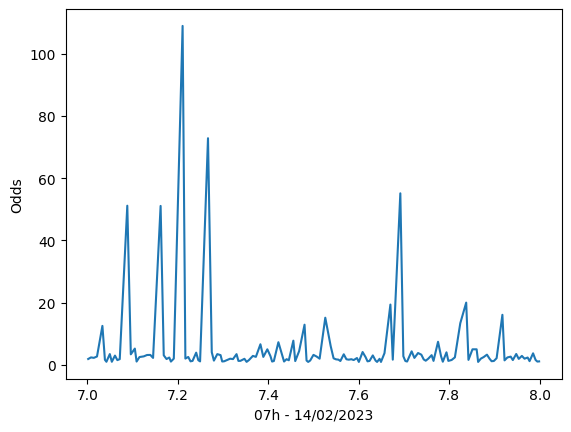

In [ ]:
X22 = data2[data2['hour'] == 7]
plt.plot(np.array(X22['hour_edi']), np.array(X22['Odds']))
plt.xlabel("07h - 14/02/2023")
plt.ylabel("Odds")
plt.show()

In [ ]:
print('Hora 7h - Geral: ', len(X22['Odds']), '\n',
"Media >= 1.29: ",len(X22[X22['Odds'] >= 1.29])/len(X22['Odds']),'\n',
"Media >= 1.40: ",len(X22[X22['Odds'] >= 1.40])/len(X22['Odds']),'\n',
"Media >= 1.45: ",len(X22[X22['Odds'] >= 1.45])/len(X22['Odds']),'\n',
"Media >= 1.61: ",len(X22[X22['Odds'] >= 1.65])/len(X22['Odds']),'\n')



Hora 7h - Geral:  147 
 Media >= 1.29:  0.8367346938775511 
 Media >= 1.40:  0.7619047619047619 
 Media >= 1.45:  0.7482993197278912 
 Media >= 1.61:  0.673469387755102 



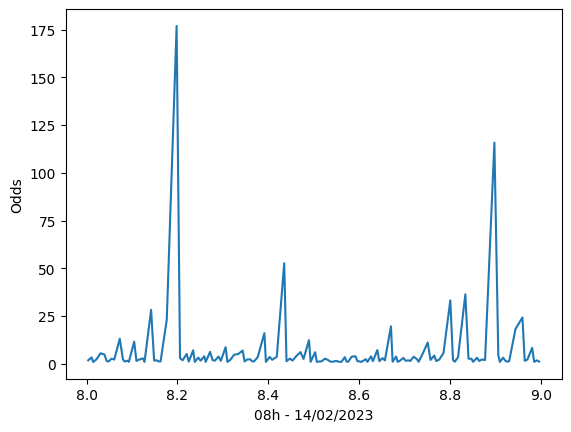

In [ ]:
X23 = data2[data2['hour'] == 8]
plt.plot(np.array(X23['hour_edi']), np.array(X23['Odds']))
plt.xlabel("08h - 14/02/2023")
plt.ylabel("Odds")
plt.show()

In [ ]:
print('Hora 8h - Geral: ', len(X23['Odds']), '\n',
"Media >= 1.29: ",len(X23[X23['Odds'] >= 1.29])/len(X23['Odds']),'\n',
"Media >= 1.40: ",len(X23[X23['Odds'] >= 1.40])/len(X23['Odds']),'\n',
"Media >= 1.45: ",len(X23[X23['Odds'] >= 1.45])/len(X23['Odds']),'\n',
"Media >= 1.61: ",len(X23[X23['Odds'] >= 1.65])/len(X23['Odds']),'\n')


Hora 8h - Geral:  144 
 Media >= 1.29:  0.7569444444444444 
 Media >= 1.40:  0.7013888888888888 
 Media >= 1.45:  0.6944444444444444 
 Media >= 1.61:  0.6041666666666666 



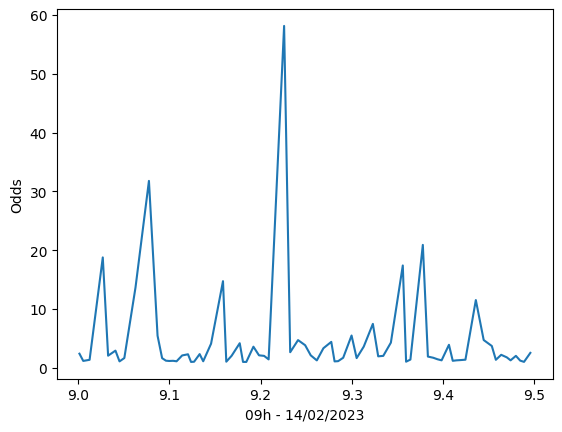

In [ ]:
X24 = data2[data2['hour'] == 9]
plt.plot(np.array(X24['hour_edi']), np.array(X24['Odds']))
plt.xlabel("09h - 14/02/2023")
plt.ylabel("Odds")
plt.show()

In [ ]:

print('Hora 9h - Geral: ', len(X24['Odds']), '\n',
"Media >= 1.29: ",len(X24[X24['Odds'] >= 1.29])/len(X24['Odds']),'\n',
"Media >= 1.40: ",len(X24[X24['Odds'] >= 1.40])/len(X24['Odds']),'\n',
"Media >= 1.45: ",len(X24[X24['Odds'] >= 1.45])/len(X24['Odds']),'\n',
"Media >= 1.61: ",len(X24[X24['Odds'] >= 1.65])/len(X24['Odds']),'\n')



Hora 9h - Geral:  75 
 Media >= 1.29:  0.7066666666666667 
 Media >= 1.40:  0.6533333333333333 
 Media >= 1.45:  0.6266666666666667 
 Media >= 1.61:  0.6 

